In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from estimation import sampling
np.random.seed(0)

# 1

### Generate 1,000 samples having normal distribution with a mean of 100 and a variance of 1

In [2]:
s = np.round_(np.random.normal(loc = 100, scale = 5, size = 1000), 1)
pd.DataFrame(s,columns = ['value']).head()

,value
0,108.8
1,102.0
2,104.9
3,111.2
4,109.3


In [3]:
print(f'min: {np.min(s)}')
print(f'max: {np.max(s)}')

min: 84.8
max: 113.8


Drawing graph

In [4]:
uniq, counts = np.unique(s, return_counts=True)

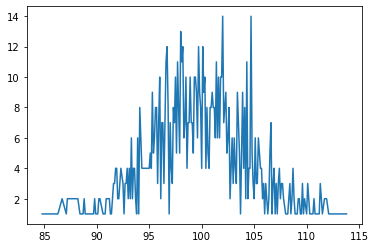

In [5]:
plt.plot(uniq, counts)
plt.show()

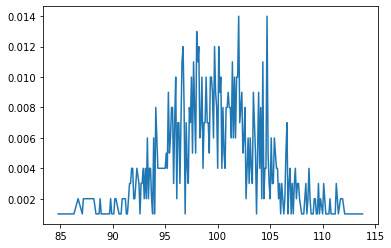

In [6]:
probability = counts/1000
plt.plot(uniq, probability)
plt.show()

## 2

# <div align="center"><b>Single population</b></div>
### <div align="center"><b> Estimate mean in sample distribution</b></div>
$$ \overline{X} = \frac{1}{n}\sum_{i=1}^{n}X_i $$
### <div align="center"><b> Estimate variance in sample distribution</b></div>
$$S^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i-\overline{X})^2 $$
### <div align="center"><b> Using sample distribution, Estimate population mean with 95% confidence interval </b></div>
$$ \overline{x} - z_{0.025}\frac{s}{\sqrt{n}} < \mu < \overline{x} + z_{0.025}\frac{s}{\sqrt{n}} $$
### <div align="center"><b> Using sample distribution, Estimate population variance with 95% confidence interval </b></div>
$$ \frac{(n-1)s^2}{\chi_{0.025}^2} < \sigma^2 < \frac{(n-1)s^2}{\chi_{1-0.025}^2} $$
### <div align="center"><b> Estimate population mean without knowing population variance </b></div>
$$ \overline{x} - t_{0.025}\frac{s}{\sqrt{n}} < \mu < \overline{x} + t_{0.025}\frac{s}{\sqrt{n}} $$

#### Randomly sample 10 samples from population

In [8]:
samples_10_1 = sampling(s, 10)
print(samples_10_1)

samples_10_1.estimate_population_mean_and_variance()
samples_10_1.estimate_population_mean_t_distribution()

Randomly sample 10 samples from population : 101.1, 95.0, 101.9, 104.1, 101.8, 88.7, 100.1, 101.6, 103.3, 93.6

Estimate sample mean: 99.1
Estimate sample variance: 24.92

Estimate population mean with 95% confidence interval : 83.65 < μ < 114.55
Estimate population variance with 95% confidence interval : 11.79 < σ^2 < 83.07
Estimate population mean with 95% confidence interval in t-distribution : 79.82 < μ < 118.38


#### Randomly sample 30 samples from population

In [9]:
samples_30_1 = sampling(s, 30)
print(samples_30_1)

samples_30_1.estimate_population_mean_and_variance()
samples_30_1.estimate_population_mean_t_distribution()

Randomly sample 30 samples from population : 97.5, 105.5, 99.4, 95.0, 94.7, 97.4, 101.6, 102.6, 100.5, 98.4, 96.2, 99.9, 110.3, 101.5, 101.2, 98.7, 89.7, 106.9, 108.7, 102.2, 106.2, 104.7, 99.4, 100.5, 97.3, 99.5, 93.3, 98.1, 101.8, 94.7

Estimate sample mean: 100.1
Estimate sample variance: 21.28

Estimate population mean with 95% confidence interval : 92.49 < μ < 107.71
Estimate population variance with 95% confidence interval : 13.5 < σ^2 < 38.46
Estimate population mean with 95% confidence interval in t-distribution : 90.59 < μ < 109.61


#### Randomly sample 61 samples from population

In [10]:
samples_61_1 = sampling(s, 61)
print(samples_61_1)

samples_61_1.estimate_population_mean_and_variance()
samples_61_1.estimate_population_mean_t_distribution()

Randomly sample 61 samples from population : 102.3, 106.1, 94.6, 107.5, 104.1, 96.5, 97.0, 102.1, 86.7, 100.4, 102.3, 97.0, 99.1, 101.9, 95.5, 106.1, 105.0, 106.9, 99.4, 106.6, 102.0, 102.0, 94.2, 97.9, 95.2, 98.8, 108.8, 109.8, 96.7, 97.6, 106.2, 99.7, 97.1, 96.9, 103.4, 99.7, 89.8, 99.8, 94.2, 90.2, 96.7, 95.8, 95.5, 96.6, 102.0, 102.5, 108.7, 97.0, 101.0, 100.3, 96.6, 102.6, 101.8, 91.8, 102.9, 94.0, 94.5, 94.3, 111.3, 102.3, 102.2

Estimate sample mean: 99.8
Estimate sample variance: 26.51

Estimate population mean with 95% confidence interval : 93.15 < μ < 106.45
Estimate population variance with 95% confidence interval : 19.1 < σ^2 < 39.29
Estimate population mean with 95% confidence interval in t-distribution : 91.49 < μ < 108.11


## Repeat #2

In [11]:
samples_10_2 = sampling(s, 10)
print(samples_10_2)

samples_10_2.estimate_population_mean_and_variance()
samples_10_2.estimate_population_mean_t_distribution()

Randomly sample 10 samples from population : 91.5, 99.3, 111.3, 96.8, 105.5, 95.8, 103.1, 108.3, 92.7, 96.7

Estimate sample mean: 100.1
Estimate sample variance: 44.57

Estimate population mean with 95% confidence interval : 72.48 < μ < 127.72
Estimate population variance with 95% confidence interval : 21.09 < σ^2 < 148.57
Estimate population mean with 95% confidence interval in t-distribution : 65.61 < μ < 134.59


In [12]:
samples_30_2 = sampling(s, 30)
print(samples_30_2)

samples_30_2.estimate_population_mean_and_variance()
samples_30_2.estimate_population_mean_t_distribution()

Randomly sample 30 samples from population : 92.1, 94.9, 102.7, 96.2, 101.8, 94.2, 92.7, 96.8, 109.6, 104.4, 98.9, 102.9, 108.7, 104.3, 104.2, 97.6, 96.7, 109.8, 85.8, 99.8, 92.3, 97.8, 94.9, 99.7, 98.8, 99.1, 94.2, 99.4, 104.8, 94.9

Estimate sample mean: 99.0
Estimate sample variance: 31.15

Estimate population mean with 95% confidence interval : 87.85 < μ < 110.15
Estimate population variance with 95% confidence interval : 19.76 < σ^2 < 56.29
Estimate population mean with 95% confidence interval in t-distribution : 85.08 < μ < 112.92


In [13]:
samples_61_2 = sampling(s, 61)
print(samples_61_2)

samples_61_2.estimate_population_mean_and_variance()
samples_61_2.estimate_population_mean_t_distribution()

Randomly sample 61 samples from population : 101.4, 100.1, 100.2, 99.9, 98.2, 100.3, 98.8, 98.1, 101.0, 94.6, 103.4, 107.7, 96.3, 92.6, 95.2, 93.7, 97.0, 107.4, 99.4, 99.4, 107.7, 106.6, 102.2, 96.1, 99.0, 92.6, 100.1, 102.0, 99.2, 103.2, 91.2, 99.7, 88.4, 95.1, 99.3, 105.2, 100.7, 103.6, 99.1, 102.7, 96.6, 103.8, 104.5, 102.1, 109.3, 103.4, 100.8, 99.4, 100.1, 103.4, 100.9, 93.5, 96.7, 107.5, 110.0, 108.4, 96.0, 103.5, 108.8, 100.7, 98.8

Estimate sample mean: 100.4
Estimate sample variance: 22.07

Estimate population mean with 95% confidence interval : 94.86 < μ < 105.94
Estimate population variance with 95% confidence interval : 15.9 < σ^2 < 32.71
Estimate population mean with 95% confidence interval in t-distribution : 93.49 < μ < 107.31
